___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
pip install pandas_datareader

In [2]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [3]:
import os
start = datetime(2006, 1, 1)

end = datetime(2016, 1, 1)
#BAC = pdr.DataReader("C",'yahoo', start, end, api_key='ALPHAVANTAGE_API_KEY')
BAC=pdr.DataReader("BAC", "av-daily", start,
                      end,
                      api_key='ALPHAVANTAGE_API_KEY')
C=pdr.DataReader("C", "av-daily", start,
                      end,
                      api_key='ALPHAVANTAGE_API_KEY')
GS=pdr.DataReader("GS", "av-daily", start,
                      end,
                      api_key='ALPHAVANTAGE_API_KEY')
JPM=pdr.DataReader("JPM", "av-daily", start,
                      end,
                      api_key='ALPHAVANTAGE_API_KEY')
MS=pdr.DataReader("MS", "av-daily", start,
                      end,
                      api_key='ALPHAVANTAGE_API_KEY')
WFC=pdr.DataReader("WFC", "av-daily", start,
                      end,
                      api_key='ALPHAVANTAGE_API_KEY')



In [4]:
BAC.head()

,open,high,low,close,volume
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970700
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15619400


In [5]:
C.head()

,open,high,low,close,volume
2006-01-03,49.00,49.38,48.11,49.29,15376000
2006-01-04,48.86,49.10,48.35,48.38,18709000
2006-01-05,48.44,48.78,48.40,48.62,11431000
2006-01-06,48.88,48.90,48.20,48.62,13702000
2006-01-09,48.60,48.74,48.30,48.39,16807000


In [6]:
GS.head()

,open,high,low,close,volume
2006-01-03,126.70,129.44,124.23,128.87,6188700
2006-01-04,127.35,128.91,126.38,127.09,4861600
2006-01-05,126.00,127.32,125.61,127.04,3717400
2006-01-06,127.29,129.25,127.29,128.84,4319600
2006-01-09,128.50,130.62,128.00,130.39,4723500


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [7]:
tickers='BAC C GS JPM MS WFC'.split()
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [8]:
bank_stocks=pd.concat([BAC ,C ,GS ,JPM ,MS ,WFC],axis=1,keys=tickers)

In [9]:
bank_stocks

BAC                                     C                       \
             open   high    low  close    volume   open   high    low  close   
2006-01-03  46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04  47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05  46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06  46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09  46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   
...           ...    ...    ...    ...       ...    ...    ...    ...    ...   
2015-12-24  17.32  17.38  17.22  17.27  29373415  52.48  52.97  52.45  52.71   
2015-12-28  17.22  17.23  16.98  17.13  41759993  52.57  52.57  51.96  52.38   
2015-12-29  17.25  17.35  17.16  17.28  45628449  52.76  53.22  52.74  52.98   
2015-12-30  17.20  17.24  17.04  17.05  35035518  52.84  52.94  52.25  52.30   
2015-12-31  17.01  17.07  16.83  16.83  47106760  52.07  52.39  51.75  51.75   

                      ...     MS                                      WFC  \
              volume  ...   open     high      low  close   volume   open   
2006-01-03  15376000  ...  57.17  58.4900  56.7400  58.31  5377000  63.20   
2006-01-04  18709000  ...  58.70  59.2800  58.3500  58.35  7977800  63.60   
2006-01-05  11431000  ...  58.55  58.5900  58.0200  58.51  5778000  63.00   
2006-01-06  13702000  ...  58.77  58.8500  58.0500  58.57  6889800  63.16   
2006-01-09  16807000  ...  58.63  59.2900  58.6244  59.19  4144500  63.35   
...              ...  ...    ...      ...      ...    ...      ...    ...   
2015-12-24   4671254  ...  32.57  32.7100  32.4400  32.48  2798163  54.97   
2015-12-28   8760444  ...  32.36  32.3600  31.9500  32.17  5420280  54.55   
2015-12-29  10153534  ...  32.44  32.7016  32.3250  32.55  6388244  55.11   
2015-12-30   8763137  ...  32.50  32.6450  32.2000  32.23  5057162  55.27   
2015-12-31  11274831  ...  31.91  32.3000  31.7700  31.81  8149307  54.51   

                                              
               high     low  close    volume  
2006-01-03  63.9500  62.390  63.80   5508200  
2006-01-04  63.6400  62.730  63.06   5435000  
2006-01-05  63.1100  62.620  62.99   5079000  
2006-01-06  63.5500  62.770  63.36   4201900  
2006-01-09  63.6500  63.110  63.35   2809800  
...             ...     ...    ...       ...  
2015-12-24  55.0900  54.710  54.82   4999417  
2015-12-28  54.7800  54.170  54.68   8288759  
2015-12-29  55.3500  54.990  55.29   7894876  
2015-12-30  55.3100  54.794  54.89   8016893  
2015-12-31  54.9499  54.220  54.36  10929420  

[2517 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [11]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    open   high    low  close    volume   open   high    low  close   
2006-01-03   46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04   47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05   46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06   46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09   46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   

Bank Ticker            ...     MS                                    WFC  \
Stock Info     volume  ...   open   high      low  close   volume   open   
2006-01-03   15376000  ...  57.17  58.49  56.7400  58.31  5377000  63.20   
2006-01-04   18709000  ...  58.70  59.28  58.3500  58.35  7977800  63.60   
2006-01-05   11431000  ...  58.55  58.59  58.0200  58.51  5778000  63.00   
2006-01-06   13702000  ...  58.77  58.85  58.0500  58.57  6889800  63.16   
2006-01-09   16807000  ...  58.63  59.29  58.6244  59.19  4144500  63.35   

Bank Ticker                                
Stock Info    high    low  close   volume  
2006-01-03   63.95  62.39  63.80  5508200  
2006-01-04   63.64  62.73  63.06  5435000  
2006-01-05   63.11  62.62  62.99  5079000  
2006-01-06   63.55  62.77  63.36  4201900  
2006-01-09   63.65  63.11  63.35  2809800  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [12]:
for i in tickers:
    print(i,bank_stocks[i]['close'].max())

BAC 54.9
C 60.34
GS 247.92
JPM 70.08
MS 89.3
WFC 73.0


In [13]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [14]:
returns=pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [15]:
for i in tickers:
    returns[i+'Return']=bank_stocks[i]['close'].pct_change()

In [16]:
returns

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156
2015-12-30,-0.013310,-0.012835,-0.008282,-0.007157,-0.009831,-0.007235


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

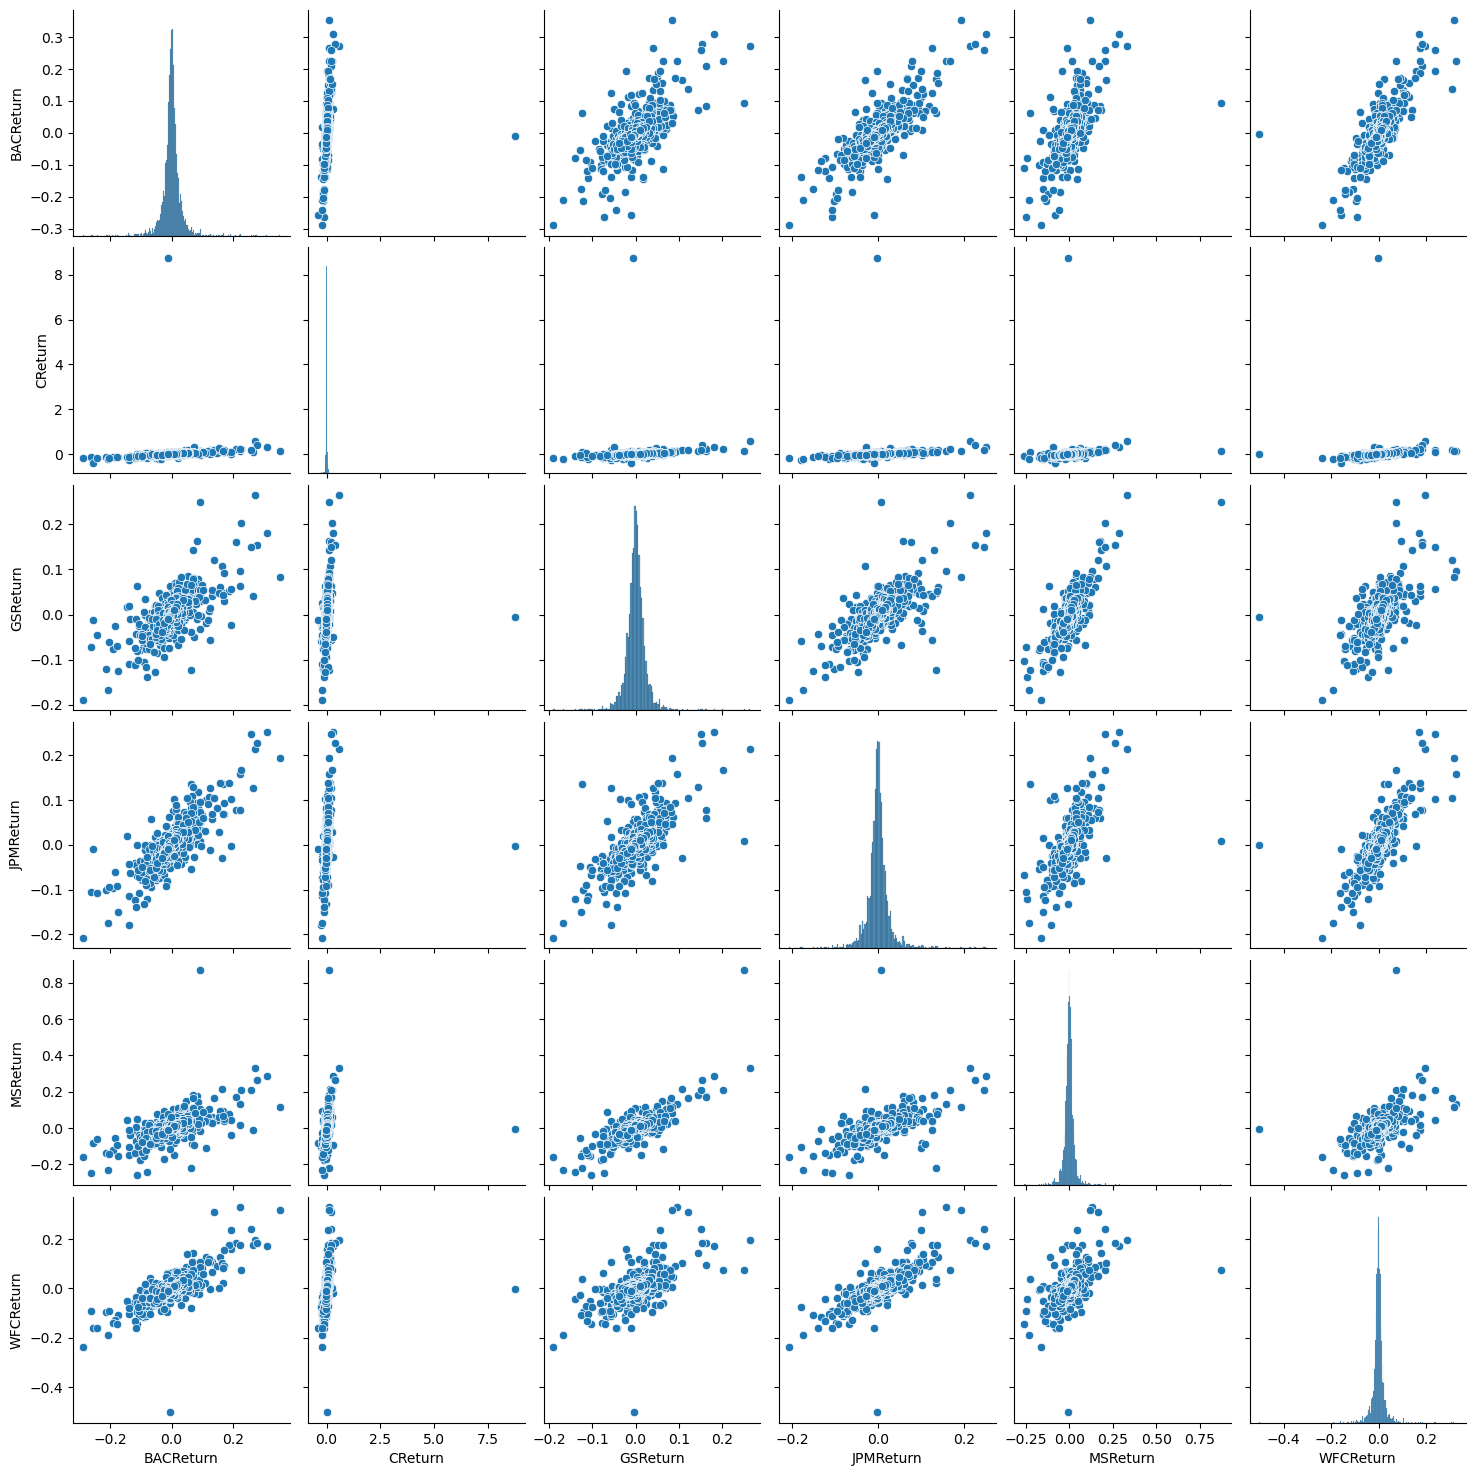

In [17]:
import seaborn as sns
#import matplotlib.pyplot as plt
sns.pairplot(returns[1:])
#plt.show()

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [18]:
returns.reset_index

<bound method DataFrame.reset_index of             BACReturn   CReturn  GSReturn  JPMReturn  MSReturn  WFCReturn
2006-01-03        NaN       NaN       NaN        NaN       NaN        NaN
2006-01-04  -0.010620 -0.018462 -0.013812  -0.014183  0.000686  -0.011599
2006-01-05   0.001288  0.004961 -0.000393   0.003029  0.002742  -0.001110
2006-01-06  -0.001501  0.000000  0.014169   0.007046  0.001025   0.005874
2006-01-09   0.000644 -0.004731  0.012030   0.016242  0.010586  -0.000158
...               ...       ...       ...        ...       ...        ...
2015-12-24  -0.004037  0.001520 -0.002624  -0.001948 -0.003681  -0.003997
2015-12-28  -0.008107 -0.006261 -0.004658  -0.003303 -0.009544  -0.002554
2015-12-29   0.008757  0.011455  0.010516   0.010395  0.011812   0.011156
2015-12-30  -0.013310 -0.012835 -0.008282  -0.007157 -0.009831  -0.007235
2015-12-31  -0.012903 -0.010516 -0.009780  -0.008410 -0.013031  -0.009656

[2517 rows x 6 columns]>

In [19]:
returns.idxmin()

BACReturn    2009-01-20
CReturn      2009-02-27
GSReturn     2009-01-20
JPMReturn    2009-01-20
MSReturn     2008-10-09
WFCReturn    2006-08-14
dtype: object

In [20]:
returns.idxmax()

BACReturn    2009-04-09
CReturn      2011-05-09
GSReturn     2008-11-24
JPMReturn    2009-01-21
MSReturn     2008-10-13
WFCReturn    2008-07-16
dtype: object

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [21]:
returns.std()

BACReturn    0.036628
CReturn      0.179066
GSReturn     0.025358
JPMReturn    0.027651
MSReturn     0.037821
WFCReturn    0.031838
dtype: float64

In [22]:
returns.loc['2015-01-01':'2015-12-31'].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\Jyoti\AppData\Local\Temp\ipykernel_24128\2519005156.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'],bins=100,color='green')


<Axes: xlabel='MSReturn', ylabel='Density'>

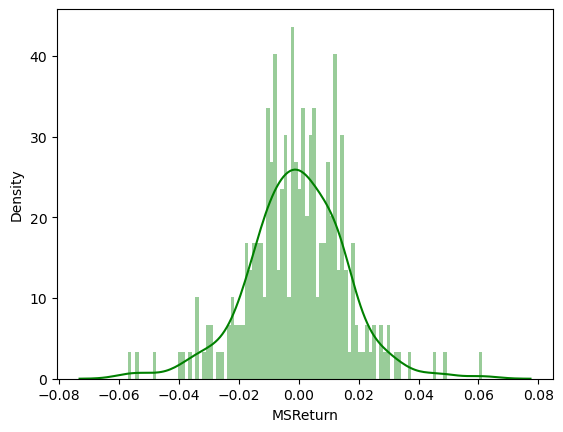

In [23]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'],bins=100,color='green')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\Jyoti\AppData\Local\Temp\ipykernel_24128\600443079.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],bins=100,color='red')


<Axes: xlabel='CReturn', ylabel='Density'>

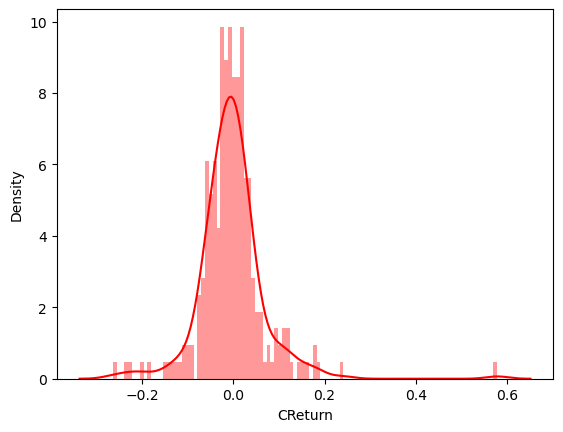

In [24]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],bins=100,color='red')

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

C:\Users\Jyoti\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

<Axes: >

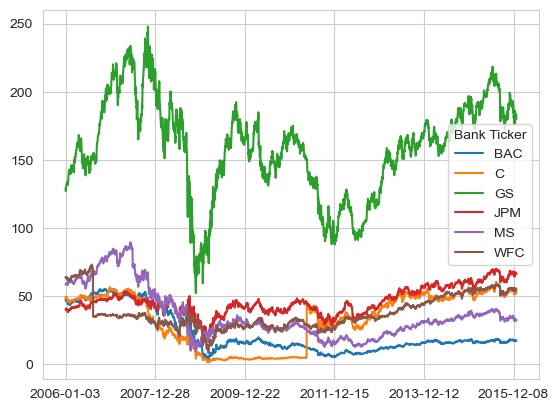

In [26]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').plot()

In [28]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

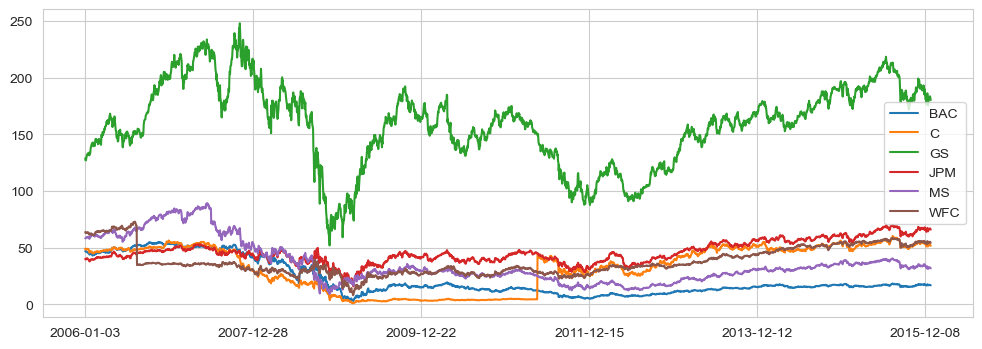

In [29]:
for i in tickers:
    bank_stocks[i]['close'].plot(label=i,figsize=(12,4))
plt.legend()

In [31]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

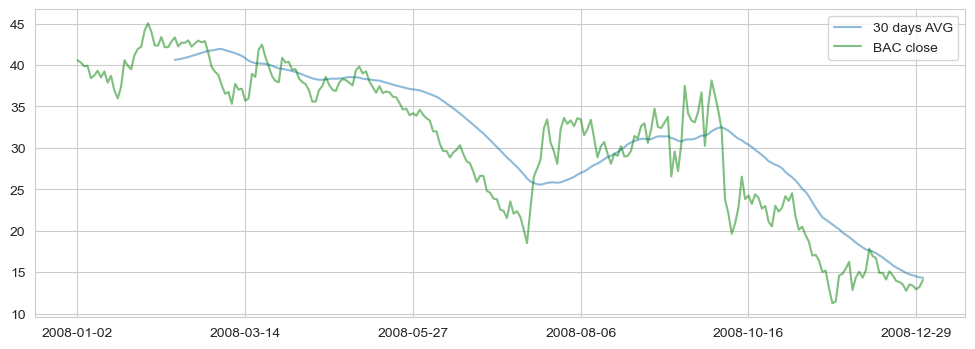

In [32]:
plt.figure(figsize=(12,4))
BAC['close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 days AVG',alpha=0.5)
BAC['close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC close',color='green',alpha=0.5)
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

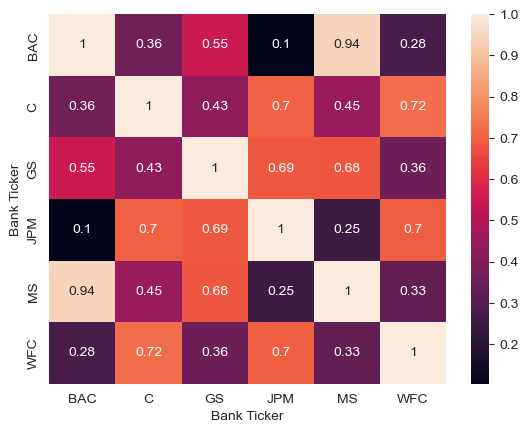

In [33]:
corr=bank_stocks.xs(key='close',axis=1,level='Stock Info').corr()
sns.heatmap(corr,annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

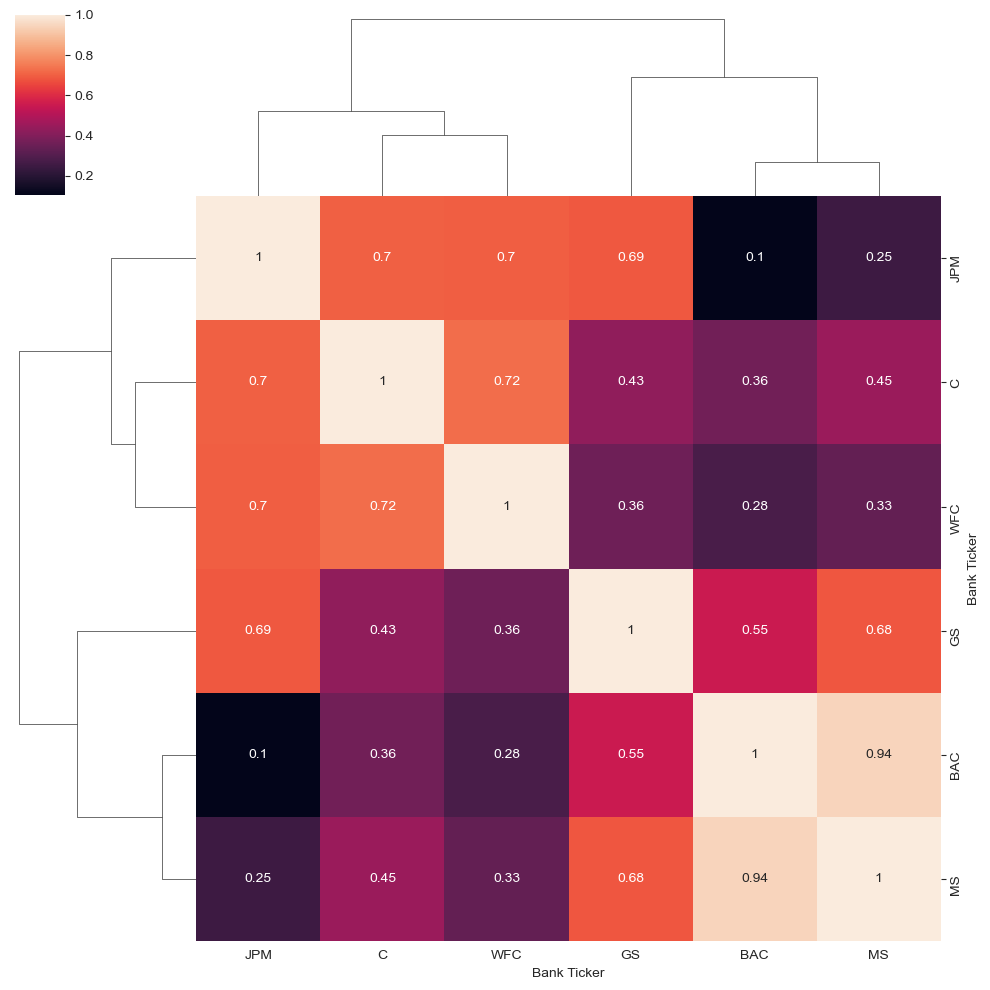

In [34]:
sns.clustermap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

# Part 2

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [35]:
bac=BAC[['open','high','low','close']]
bac.loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [36]:
MS[['open','high','low','close']].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [37]:
BAC[['close']].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')